
# Part A-Stage 2 

## B1. Dataset preparation and description through code

This data has been gathered at two solar power plants in India over a 34 day period. It has two pairs of files - each pair has one power generation dataset and one weather sensor readings dataset. The power generation datasets are gathered at the inverter level - each inverter has multiple lines of solar panels attached to it. The sensor data is gathered at a plant level - single array of sensors optimally placed at the plant. 

The selected Dataset is a set of observations sourced from National Power portal, India(https://npp.gov.in) for 2 Solar Power Plants possibly functioning for a city . It is also available on open source coding website-kaggle (https://shorturl.at/iruY3).

<b>Characteristics of the dataset:</b> It is composed of text data, numeric values, source keys, not hugely dimensional, timestamps, data size is as described below. There is no missing data as described below. The target class obtained after setting a limit for irradiation levels, is fairly balanced with about 47% of the data as 0 and the rest as 1.

Data has been wrangled before starting visualisation, feature selection and modelling as described below.


### Questions from the dataset:

There are a few areas of concern at the solar power plant - 
What could be the predicted value of solar power generation for the next couple of days for better electricity grid management in the city?
How does inverter efficiency affect the power generation from a solar power plant?

### Entity-Relationship Diagram of the dataset:


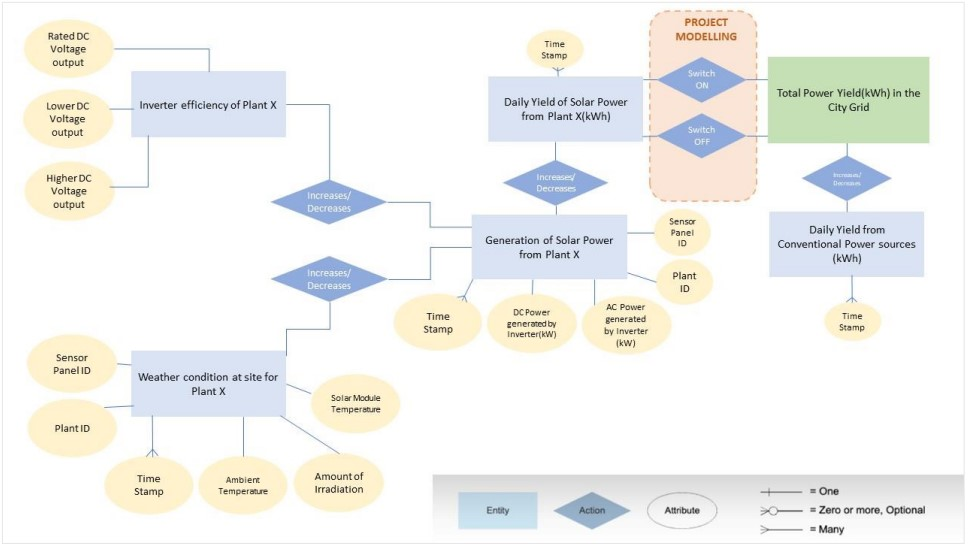

In [1]:
#importing all the libraries

import numpy as np # numpy array and performing algebraic operations
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #data visualisation and plots
import matplotlib.pyplot as plt #data visualisation and plots

 

In [2]:
pg1 = pd.read_csv('C:/Users/arjyo/PycharmProjects/PRML_Stage2/dataset/Plant_1_Generation_Data.csv')
pg2 = pd.read_csv('C:/Users/arjyo/PycharmProjects/PRML_Stage2/dataset/Plant_2_Generation_Data.csv')
wd1 = pd.read_csv('C:/Users/arjyo/PycharmProjects/PRML_Stage2/dataset/Plant_1_Weather_Sensor_Data.csv')
wd2 = pd.read_csv('C:/Users/arjyo/PycharmProjects/PRML_Stage2/dataset/Plant_2_Weather_Sensor_Data.csv')

df_list = [pg1,wd1,pg2,wd2]

In [3]:
pg1.shape

(68778, 7)

In [4]:
print(wd1.shape,pg1.shape,wd2.shape,pg2.shape) #to get (rowsxcolumns) of each data file

(3182, 6) (68778, 7) (3259, 6) (67698, 7)


In [5]:
wd1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [6]:
wd2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


In [7]:
pg1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [8]:
pg2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


### Checking for any missing values in the dataset: 
The dataset is searched for having any NA values before starting the visualisation and further analysis part. There are no missing values as seen below:

In [9]:
#check for missing data percentage

print("*******************Plant_1_Sensor*****************")
print(wd1.isna().sum()/wd1.shape[0]*100)
print("*******************Plant_1_Generation*****************")
print(pg1.isna().sum()/pg1.shape[0]*100)
print("*******************Plant_2_Sensor*****************")
print(wd2.isna().sum()/wd2.shape[0]*100)
print("*******************Plant_2_Generation*****************")
print(pg2.isna().sum()/pg2.shape[0]*100)

*******************Plant_1_Sensor*****************
DATE_TIME              0.0
PLANT_ID               0.0
SOURCE_KEY             0.0
AMBIENT_TEMPERATURE    0.0
MODULE_TEMPERATURE     0.0
IRRADIATION            0.0
dtype: float64
*******************Plant_1_Generation*****************
DATE_TIME      0.0
PLANT_ID       0.0
SOURCE_KEY     0.0
DC_POWER       0.0
AC_POWER       0.0
DAILY_YIELD    0.0
TOTAL_YIELD    0.0
dtype: float64
*******************Plant_2_Sensor*****************
DATE_TIME              0.0
PLANT_ID               0.0
SOURCE_KEY             0.0
AMBIENT_TEMPERATURE    0.0
MODULE_TEMPERATURE     0.0
IRRADIATION            0.0
dtype: float64
*******************Plant_2_Generation*****************
DATE_TIME      0.0
PLANT_ID       0.0
SOURCE_KEY     0.0
DC_POWER       0.0
AC_POWER       0.0
DAILY_YIELD    0.0
TOTAL_YIELD    0.0
dtype: float64


### Converting the timestamp columns from object type to date_time type: 

The timestamp is converted from object type to date_time type to extract information related to time and its visualisation. It will help to show how each feature varies with time.


In [10]:
#converting the timestamp column from object type into date_time column type format
from datetime import datetime

#pg1['DATE_TIME'] = pd.to_datetime(pg1['DATE_TIME'].dt.strftime('%Y-%m-%d %H:%M:%S'))

pg1['DATE_TIME'] = pd.to_datetime(pg1.DATE_TIME, format='%d-%m-%Y %H:%M')
pg2['DATE_TIME'] = pd.to_datetime(pg2.DATE_TIME, format='%Y-%m-%d %H:%M:%S')
wd1['DATE_TIME'] = pd.to_datetime(wd1.DATE_TIME, format='%Y-%m-%d %H:%M:%S')
wd2['DATE_TIME'] = pd.to_datetime(wd2.DATE_TIME, format='%Y-%m-%d %H:%M:%S')

#for i, j in enumerate(df_list):
    #j['DATE_TIME'] = pd.to_datetime(j['DATE_TIME'])


In [11]:
pg1['DATE_TIME'].dtypes #checking the column type of date_time


dtype('<M8[ns]')

In [12]:
#pg1['DATE_TIME'] = pg1['DATE_TIME'].dt.strftime('%Y-%m-%d %H:%M:%S')


----------------------------------------------------------------------------------------------------

## B2.1 Dataset analysis,visualisation and insights

### B2.1.1 Inverter Analysis

Inverters in a solar power plant are used to convert the DC solar power into AC power which can be circulated into the grid. There are 22 inverters in each plant 1 and 2 described in the dataset. The inverters convert DC power to AC power, so their performance can be examined by looking at the DC to AC conversions. 

The inverter efficiency refers to how much DC power will be converted to AC power, as some of the power will be lost during this transition in through Heat and Transmission loss.

The inverter efficiency value depends on inverter load power capacity variation. Generally, below 15% inverter loading, the efficiency will be quite low. Consequently, good matching between inverter capacity and its load capacity will enable us to harvest larger efficiency, which means larger inverter AC output power for the same DC input power. 

<b>From the calculations below we will observe:</b> 
The plant 1 inverters are relatively stable with only a 10.07 kW standard deviation in the mean value of AC output.
The plant 2 inverters are relatively unstable with a 32.00 kW standard deviation in the mean value of AC output.

Power Generation Site #1 has 22 inverters
Power Generation Site #2 has 22 inverters
Plant 1 Mean AC Output for each inverter


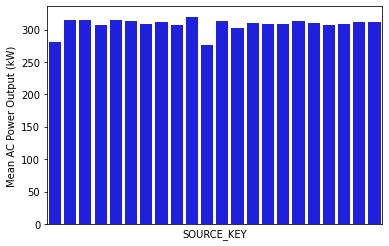

Plant 2 Mean AC Output for each inverter


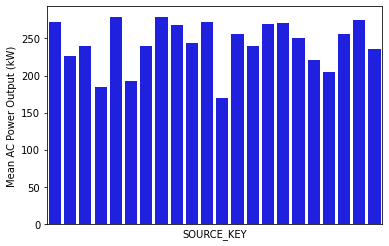

In [13]:
# Calculating the inverter quantities

pg1_inverters=pg1['SOURCE_KEY'].nunique()
pg2_inverters=pg2['SOURCE_KEY'].nunique()
print(f'Power Generation Site #1 has {pg1_inverters} inverters')
print(f'Power Generation Site #2 has {pg2_inverters} inverters')

print(f"Plant 1 Mean AC Output for each inverter")


ax=sns.barplot(data=pg1,x='SOURCE_KEY',y='AC_POWER',color='blue',ci=None)
# Seaborn automatically takes the average of the AC Power generated by each inverter for the plot
plt.xticks([])
ax.set(ylabel='Mean AC Power Output (kW)')
plt.show()

print(f"Plant 2 Mean AC Output for each inverter")

ax=sns.barplot(data=pg2,x='SOURCE_KEY',y='AC_POWER',color='blue',ci=None)
plt.xticks([])
ax.set(ylabel='Mean AC Power Output (kW)')

plt.show()



<b>above plots show a large variation in AC output from plant 2 signalling lower efficiency. This could be due to several factors, but it is likely that maintenance could be an issue at site 2. Calculating the standard deviation of the data in these figures will better quantify the extent to which the data flucuates.</b>

In [14]:
s1 = pg1.groupby('SOURCE_KEY').mean()['AC_POWER'].std()
print(f'The plant 1 inverters are relatively '
      f'stable with only a {s1:.2f} kW standard deviation in the mean')

s2 = pg2.groupby('SOURCE_KEY').mean()['AC_POWER'].std()
print(f'The plant 2 inverters are relatively '
      f'unstable with a {s2:.2f} kW standard deviation in the mean')

The plant 1 inverters are relatively stable with only a 10.07 kW standard deviation in the mean
The plant 2 inverters are relatively unstable with a 32.00 kW standard deviation in the mean


-----------------------------------------------------------------------------

### B2.1.2. Daily Yield and Temperature Analysis  

Daily Yield of solar power can be dependent on many variables. One of the most important factors are the time at which the sun hits the solar panels and the temperature the solar panel is achieving as a result of that.

In the below graph, we have displayed the trend of Daily Yield variation with respect to time and the mean value of yield achieved from both the solar power plants. The mean of daily yield from Plant 1 is slightly higher than plant 1. Also on the same date, both plants are giving different daily yield of solar power. This could be due to different inverter efficieny of both as discussed above.

The ambient temperature of the solar plant surroundings and the module temperature were also mapped. They both exhibited the same ups and downs and a similiar trend. This shows that ambient temperature of the surroundings directly affects the module temperature of the solar panel.

In [15]:
# Adding separate columns of date and time from the timestamp for plotting 

pg1['TIME']=pg1['DATE_TIME'].dt.time
pg1['DATE']=pg1['DATE_TIME'].dt.date

pg2['TIME']=pg2['DATE_TIME'].dt.time
pg2['DATE']=pg2['DATE_TIME'].dt.date

pg1.head()
pg2.head()




#wd2['TIME']=wd2['DATE_TIME'].dt.time
#wd2['DATE']=wd2['DATE_TIME'].dt.date

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,TIME,DATE
0,2020-05-15,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,00:00:00,2020-05-15
1,2020-05-15,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,00:00:00,2020-05-15
2,2020-05-15,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,00:00:00,2020-05-15
3,2020-05-15,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,00:00:00,2020-05-15
4,2020-05-15,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,00:00:00,2020-05-15


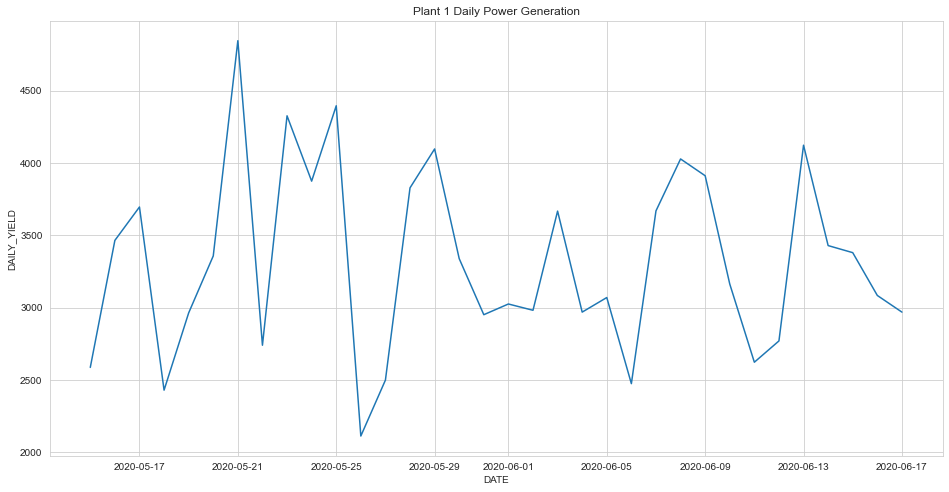

In [16]:
sns.set_style('whitegrid') #setting theme for the graph display

plt.figure(figsize=(16,8))
sns.lineplot(data=pg1,x='DATE',y='DAILY_YIELD',ci=None)
plt.title('Plant 1 Daily Power Generation')
plt.show()


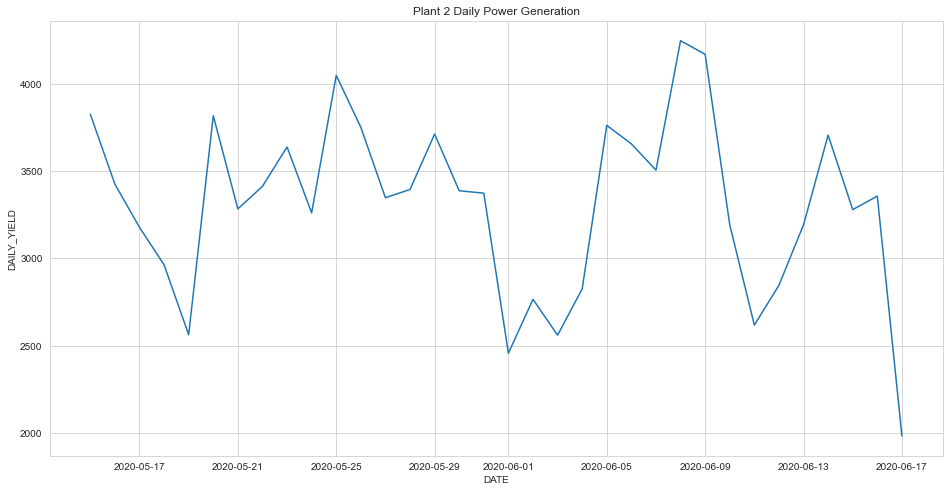

In [17]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
sns.lineplot(data=pg2,x='DATE',y='DAILY_YIELD',ci=None)
plt.title('Plant 2 Daily Power Generation')
plt.show()

In [18]:
plant_1_daily_yield_mean = pg1.groupby(['DATE']).DAILY_YIELD.sum().mean() 
plant_2_daily_yield_mean = pg2.groupby(['DATE']).DAILY_YIELD.sum().mean()

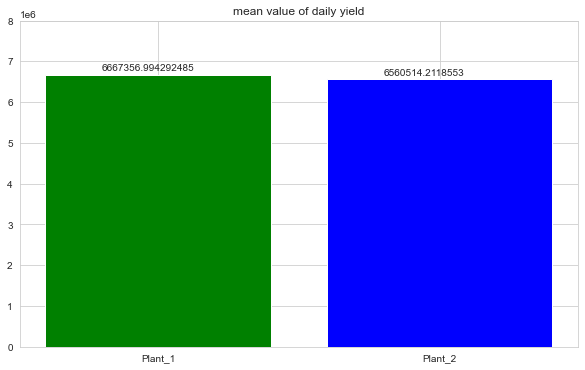

In [19]:
plt.figure(figsize=(10,6))
plt.bar(x=['Plant_1','Plant_2'],height=[plant_1_daily_yield_mean,plant_2_daily_yield_mean],color=["green","blue"])
for i,j in enumerate([plant_1_daily_yield_mean,plant_2_daily_yield_mean]):
    plt.text(i-0.2,j+100000,str(j))
plt.title("mean value of daily yield")
plt.yticks(range(0,8000001,1000000))
plt.show()

<b>The above graph shows that the mean Daily Yield of solar power from both the plants is comparable. Plant 1 has slightly higher yield than 2, probably because of higher inverter efficiency.</b>

----------------------------------------------------------------------------------------------------------------

<b>Calculating the maximum ambient and module temperature and visualise trend through graph</b>

In [20]:
max_amb_modu_temp = pd.DataFrame({'Max_Ambient':[wd1.AMBIENT_TEMPERATURE.max(),wd2.AMBIENT_TEMPERATURE.max()],
                                 'Max_Module':[wd1.MODULE_TEMPERATURE.max(),
                                               wd2.MODULE_TEMPERATURE.max()]},index=['Plant_1','Plant_2'])
max_amb_modu_temp

,Max_Ambient,Max_Module
Plant_1,35.252486,65.545714
Plant_2,39.181638,66.635953


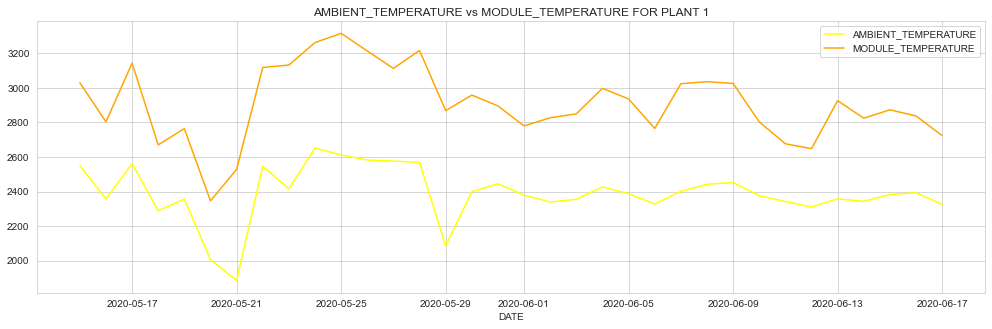

In [21]:
wd1['DATE']=wd1['DATE_TIME'].dt.date

daily_ambient_temp = wd1.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')
daily_module_temp = wd1.groupby('DATE')['MODULE_TEMPERATURE'].agg('sum')
daily_ambient_temp.sort_values(ascending=False).plot.line(figsize=(17,5), legend=True,color='yellow')
daily_module_temp.sort_values(ascending=False).plot.line(figsize=(17,5), legend=True,color='orange')
plt.title('AMBIENT_TEMPERATURE vs MODULE_TEMPERATURE FOR PLANT 1')
plt.show()

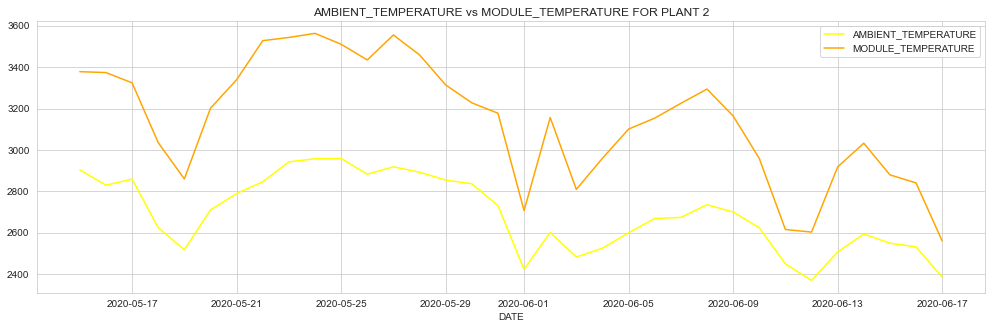

In [22]:
wd2['DATE']=wd2['DATE_TIME'].dt.date

daily_ambient_temp = wd2.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')
daily_module_temp = wd2.groupby('DATE')['MODULE_TEMPERATURE'].agg('sum')
daily_ambient_temp.sort_values(ascending=False).plot.line(figsize=(17,5), legend=True,color='yellow')
daily_module_temp.sort_values(ascending=False).plot.line(figsize=(17,5), legend=True,color='orange')
plt.title('AMBIENT_TEMPERATURE vs MODULE_TEMPERATURE FOR PLANT 2')
plt.show()

In [23]:
#Dropping Date, Time columns from pg1 and pg2 before merging the dataset to begin combined analysis and feature correlation
pg1 = pg1.drop(columns=['DATE', 'TIME'])
pg2 = pg2.drop(columns=['DATE', 'TIME'])
wd1 = wd1.drop(columns=['DATE'])
wd2 = wd2.drop(columns=['DATE'])

--------------------------------------------------------------------------------------------------------------------

### B2.1.3. Solar Irradiation calculation and analysis with DC power generation 

Solar power generation is directly dependent on Irradiation coming from the sun. 

The amount of power generated by a solar site is related to the "On-Sun" time of the panels and the intesity of solar exposure. As such, irradiation can likely be correlated to the amount of power produced. That is shown here, by comparing the shapes of the irradiation data and the DC power generated when compared to time. Each site will naturally have different data, so the plots maintain fidelity of location and are split by site. 

As predicted, the shapes of the plots appear similar between irradiation and DC power at each site. Interestingly, the data for DC power seems more diffuse than the data for irradiation for a given site. Perhaps more important though is that while the plot density of the irradiation graphs is approximately equal (to the naked eye), the plot density of the DC power output for site 2 seems much higher (thus the data points are more spread out) than that of site 1. This may affect data analysis results later. 

In [24]:
# Merge the weather and generation data
m1 = pg1.merge(wd1,right_on='DATE_TIME',left_on='DATE_TIME')
m1 = m1.drop(['PLANT_ID_y','SOURCE_KEY_y'],axis=1)
m1['TIME']=m1['DATE_TIME'].dt.time
m1['DATE']=m1['DATE_TIME'].dt.date
m2 = pg2.merge(wd2,right_on='DATE_TIME',left_on='DATE_TIME')
m2 = m2.drop(['PLANT_ID_y','SOURCE_KEY_y'],axis=1)
m2['TIME']=m2['DATE_TIME'].dt.time
m2['DATE']=m2['DATE_TIME'].dt.date

print(m1.info())
print(m2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68774 entries, 0 to 68773
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            68774 non-null  datetime64[ns]
 1   PLANT_ID_x           68774 non-null  int64         
 2   SOURCE_KEY_x         68774 non-null  object        
 3   DC_POWER             68774 non-null  float64       
 4   AC_POWER             68774 non-null  float64       
 5   DAILY_YIELD          68774 non-null  float64       
 6   TOTAL_YIELD          68774 non-null  float64       
 7   AMBIENT_TEMPERATURE  68774 non-null  float64       
 8   MODULE_TEMPERATURE   68774 non-null  float64       
 9   IRRADIATION          68774 non-null  float64       
 10  TIME                 68774 non-null  object        
 11  DATE                 68774 non-null  object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(3)
memory usage: 6.8+ MB
None
<class 

<b>Relationship between Solar irradiation falling on the plant and Time of the day</b>

<AxesSubplot:title={'center':'Plant 2 Irradiation (W/m^2) by time'}, xlabel='TIME'>

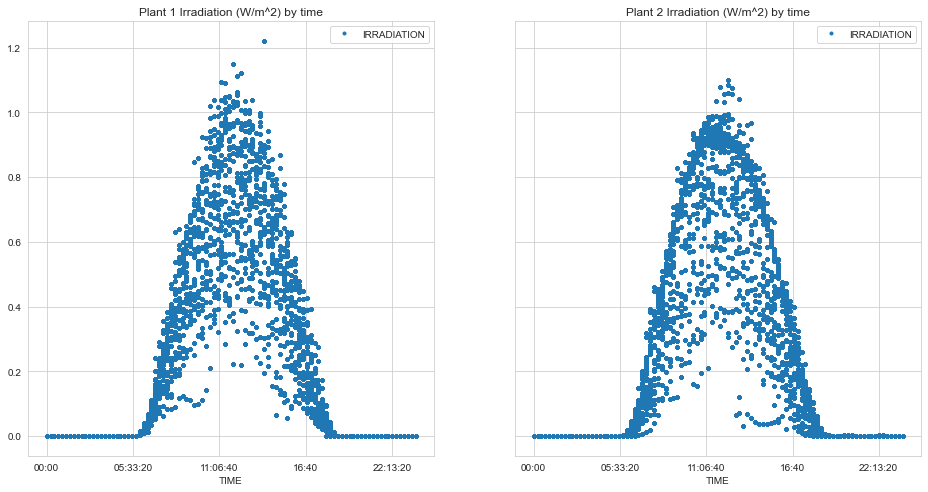

In [25]:
fig,ax = plt.subplots(1,2,figsize=(16,8),sharey=True)
m1.plot(x='TIME',y='IRRADIATION',style='.',title='Plant 1 Irradiation (W/m^2) by time',ax=ax[0])
m2.plot(x='TIME',y='IRRADIATION',style='.',title='Plant 2 Irradiation (W/m^2) by time',ax=ax[1])

<b>Relationship between Solar irradiation falling on the plant and DC Power generated by solar plant
(Almost similiar looking graphs hint at dirrect relation between the two)</b>

<AxesSubplot:title={'center':'Plant 2 DC (kW) by time'}, xlabel='TIME'>

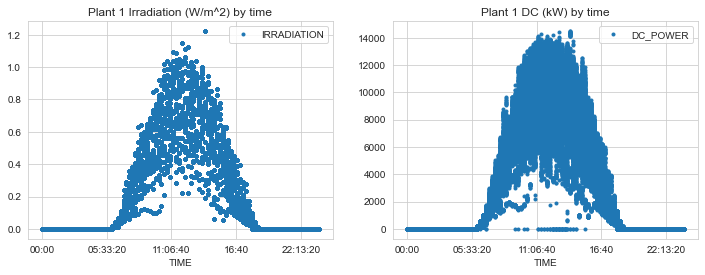

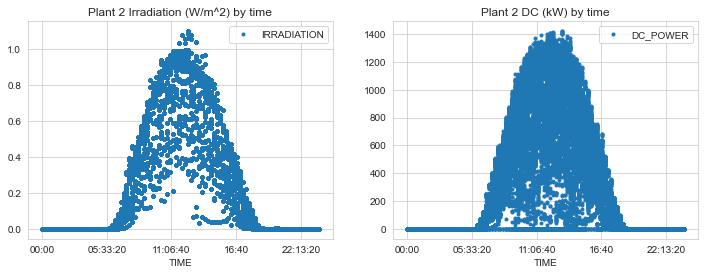

In [26]:
fig,(ax1,ax2)=plt.subplots(1, 2,figsize=(12,4))
m1.plot(x='TIME',y='IRRADIATION',style='.',title='Plant 1 Irradiation (W/m^2) by time',ax=ax1)
m1.plot(x='TIME',y='DC_POWER',style='.',title='Plant 1 DC (kW) by time',ax=ax2)

fig,(ax1,ax2)=plt.subplots(1, 2,figsize=(12,4))
m2.plot(x='TIME',y='IRRADIATION',style='.',title='Plant 2 Irradiation (W/m^2) by time',ax=ax1)
m2.plot(x='TIME',y='DC_POWER',style='.',title='Plant 2 DC (kW) by time',ax=ax2)

----------------------------------------------------------------------------

## B2.2 Feature correlation

The below matrices display the ordinal value of ranking of correlation between the different variables in the data. The correlation of both the solar plants 1 and 2 are mapped. In both matrices we can observe very high relation between AC/DC Power, Irradiation, Module temperature and Ambient temperature. The total yield and daily yield have very less correlation with the other variables meaning they may be indirectly derived from the other variables and their functions.

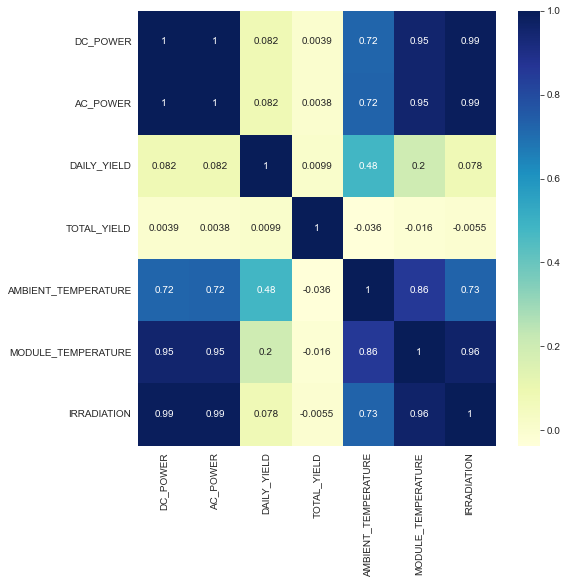

In [27]:
#Heatmap correlations for Plant 1
m1_red = m1.drop(['PLANT_ID_x','SOURCE_KEY_x'],axis=1)
m2_red = m2.drop(['PLANT_ID_x','SOURCE_KEY_x'],axis=1)
fig1,ax1=plt.subplots(figsize=(8,8))
ax1=sns.heatmap(m1_red.corr(), cmap="YlGnBu", annot=True)

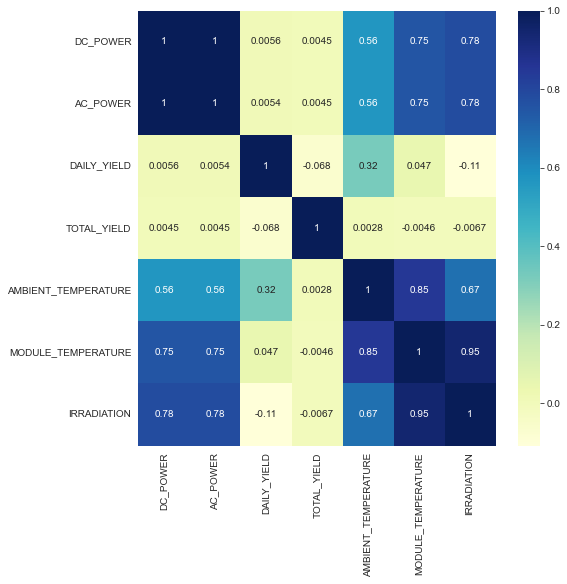

In [28]:
# Heatmap correlation for Plant 2
fig2,ax2=plt.subplots(figsize=(8,8))
ax2=sns.heatmap(m2_red.corr(), cmap="YlGnBu", annot=True)

-----------------------------------------------------------------------------------------

# B3. Feature Engineering- Feature selection and extraction


<b>Note: For further analysis only the data derived from solar plant 1 is being used.</b>

Feature engineering has been done by using: <b>Select Features by Strength of Relationship to Target</b>

Sklearn provides the <b>SelectKBest()</b> function to select a given number of features using a univariate statistical test.
The statistical test function looks for the features that have the strongest relationship with the target feature.

In [29]:
#First, we introduce a target variable for switching on the solar power for city grid based on irradiation level:

def set_target(value):
    if value <= 0.07:
        return 0
    else:
        return 1


m1['Target'] = m1['IRRADIATION'].map(set_target)

m1.head()
m1.to_csv('C:/Users/arjyo/PycharmProjects/PRML_Stage2/output/m1.csv')